In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
amazon = pd.read_csv('Amazon-items.csv')

In [6]:
amazon.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [8]:
amazon.describe()

,rating,totalReviews,price,originalPrice
count,720.000000,720.000000,720.000000,720.000000
mean,3.713750,105.679167,234.948931,63.690778
std,0.716014,167.601101,200.008441,172.405370
min,1.000000,1.000000,0.000000,0.000000
25%,3.300000,7.000000,97.512500,0.000000
50%,3.800000,32.000000,188.975000,0.000000
75%,4.100000,122.250000,336.725000,0.000000
max,5.000000,983.000000,999.990000,999.990000


In [9]:
amazon['text length'] = amazon['title'].apply(len)

In [10]:
sns.set_style('white')

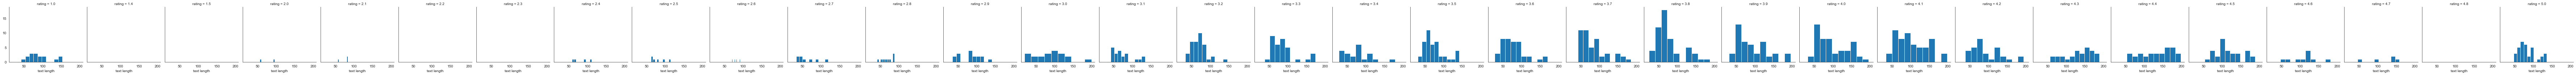

In [11]:
g = sns.FacetGrid(amazon, col = 'rating')
g.map(plt.hist, 'text length')

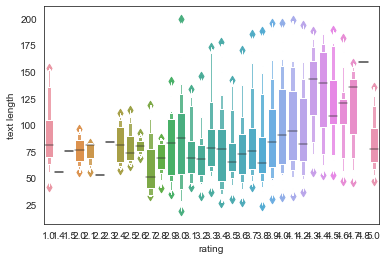

In [14]:
sns.boxenplot(x = 'rating', y='text length', data=amazon, width=0.8)

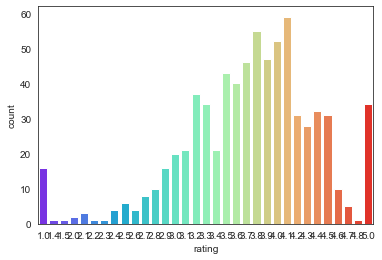

In [15]:
sns.countplot(x = 'rating',data=amazon, palette='rainbow' )

In [16]:
rating = amazon.groupby('rating').mean()
rating

,totalReviews,price,originalPrice,text length
rating,,,,
1.0,1.062500,361.660625,39.060000,90.937500
1.4,2.000000,310.990000,0.000000,56.000000
1.5,5.000000,539.990000,0.000000,75.000000
2.0,2.500000,77.485000,0.000000,76.000000
2.1,5.666667,127.296667,81.666667,73.333333
2.2,4.000000,211.630000,249.990000,53.000000
2.3,7.000000,630.710000,0.000000,84.000000
2.4,20.250000,172.485000,0.000000,82.750000
2.5,10.333333,181.431667,9.998333,80.333333


In [17]:
rating.corr()

,totalReviews,price,originalPrice,text length
totalReviews,1.000000,-0.202791,0.276207,0.196257
price,-0.202791,1.000000,-0.027322,0.540215
originalPrice,0.276207,-0.027322,1.000000,0.021483
text length,0.196257,0.540215,0.021483,1.000000


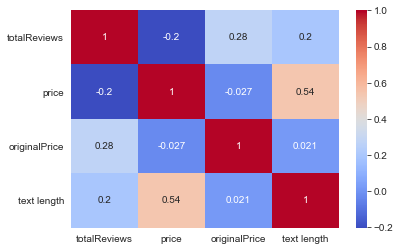

In [18]:
sns.heatmap(rating.corr(), cmap='coolwarm', annot=True)

In [19]:
amazon_class = amazon[(amazon['rating']==1) | (amazon['rating']==5)]

In [20]:
amazon_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 30 to 719
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           50 non-null     object 
 1   brand          50 non-null     object 
 2   title          50 non-null     object 
 3   url            50 non-null     object 
 4   image          50 non-null     object 
 5   rating         50 non-null     float64
 6   reviewUrl      50 non-null     object 
 7   totalReviews   50 non-null     int64  
 8   price          50 non-null     float64
 9   originalPrice  50 non-null     float64
 10  text length    50 non-null     int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 4.7+ KB


In [21]:
X = amazon_class['title']
y = amazon_class['rating']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [23]:
X = cv.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb   = MultinomialNB()

In [28]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
predictions = nb.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[0 4]
 [3 8]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         5.0       0.67      0.73      0.70        11

    accuracy                           0.53        15
   macro avg       0.33      0.36      0.35        15
weighted avg       0.49      0.53      0.51        15



In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
from sklearn.pipeline import Pipeline

In [40]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [41]:
X = amazon_class['title']
y = amazon_class['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [43]:
predictions = pipe.predict(X_test)

In [44]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 0  4]
 [ 0 11]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         5.0       0.73      1.00      0.85        11

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
